# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [34]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(arquivo)
data.drop(['state', 'area_code', 'phone_number'], axis = 1, inplace = True)

## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [36]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']
binarizer = LabelBinarizer()
for col in bin_cols:
    data[col] = binarizer.fit_transform(data[bin_cols[0]])

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))
data_scaled.columns = data.columns

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
x_cols = [x for x in data.columns if x != 'churned']

X_data = data[x_cols]
y_data = data['churned']

knc = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knc.fit(X_data, y_data)
predicted = knc.predict(X_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [67]:
def accuracy(real, predict):
    test = list(zip(real, predict))
    acc = (sum([a==b for (a, b) in test]))/len(test)
    return acc

print('Accuracy = %.2f%%' % (accuracy(y_data, predicted)*100))

Accuracy = 91.14%


## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [88]:
modes = ['distance', 'uniform']

for m in modes:
    knc = KNeighborsClassifier(n_neighbors=3, weights=m)
    knc.fit(X_data, y_data)
    predicted = knc.predict(X_data)
    print('Accuracy for \'%s\' = %.2f%%' % (m, accuracy(y_data, predicted)*100))

Accuracy for 'distance' = 100.00%
Accuracy for 'uniform' = 91.14%
Accuracy for 'distance' = 100.00%
Accuracy for = 91.48%


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [94]:
score_list = list()

'''escreva no bloco abaixo'''

for k in range(1, 20):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_data, y_data)
    predicted = knc.predict(X_data)
    acc = accuracy(y_data, predicted) * 100
    score_list += [(k, acc)]

'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

# n_neigbors = 1 causa a classificação por identidade direta,
# uma vez que o conjunto de treino é o mesmo que o de testes

Text(0.5,0,'neighbors')

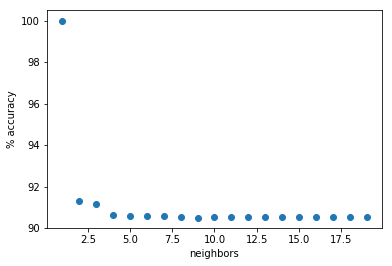

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure()
plt.scatter(score_df['k'], score_df['accuracy'])
plt.ylabel('% accuracy')
plt.xlabel('neighbors')

# O gráfico representa uma curva assintótica no número de vizinhos,
# demonstrando que o aumento de vizinhos faz o resultado convergir
# para o valor onde n é máximo

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));